## LGMVIP
#### *NAME:  SOURJADIP  MUKHERJEE*
Data Science Intern @ LGMVIP FEB2022 

Task-2: Image to Pencil Sketch with Python:


We need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo. Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details. Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image. This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python. 




# Importing Libraries

In [1]:
#Import libraries
import numpy as np
import cv2
%matplotlib inline 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
def show_image(img):
    cv2.imshow('Image' , img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Connecting with Google Colab

In [4]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import os
os.chdir('/content/drive/My Drive')

# Loading Image

In [51]:
#Load Image
img = cv2.imread(r'image.jpg', cv2.IMREAD_UNCHANGED)

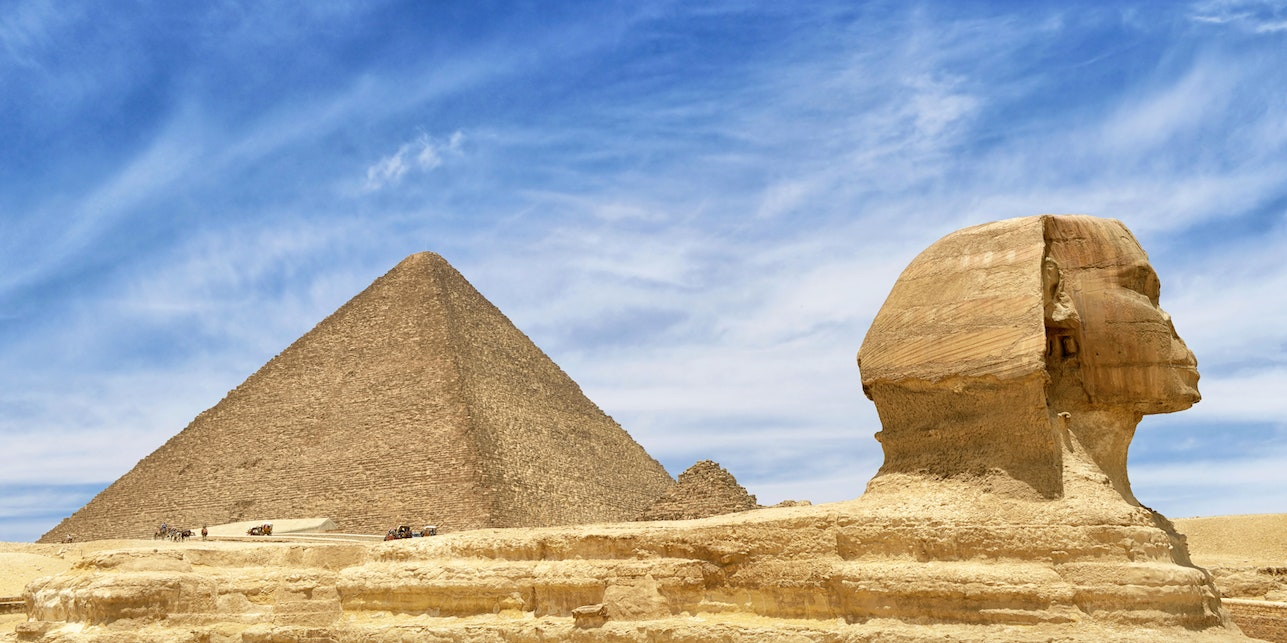

In [73]:
cv2_imshow(img)

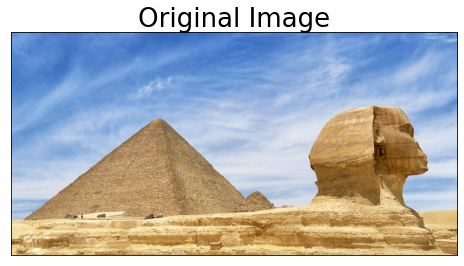

In [54]:
#Display Image
plt.figure(num = 1, figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()


In [55]:
def dodgeV2(image, mask):
    return cv2.divide(image, 255-mask, scale=256)

In [56]:
def blend(front,back):
    result=front*255/(255-back)  
    result[result>255]=255 
    result[back==255]=255 
    return result

In [57]:
def render(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        
    #Applying gaussian blur to grayscale image
    img_blur = cv2.GaussianBlur(img_gray, (21,21), 0, 0)
    
    #Invert the blur image
    inverted_img = 255 - img_blur
    
    #Apply the dodgeV2 function
    img_blend = dodgeV2(img_gray,inverted_img)
    
    #Blend the image
    img_final = 1-blend(img_blend,img_gray)

    return img_final
    

In [ ]:
final_image = render(img)
cv2_imshow(final_image)

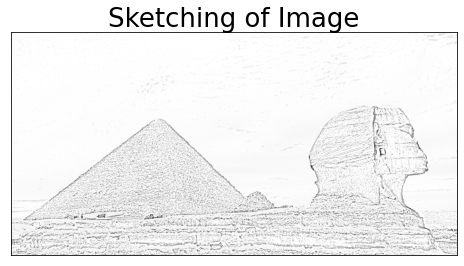

In [60]:
#Display output
plt.figure(figsize=(8,8))
plt.imshow(final_image, cmap="gray")
plt.title('Sketching of Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [77]:
cv2.imwrite('output_img.jpg', (final_image))

True

# Thank you